# Install Required Libraries

In [1]:
!pip install numpy pandas matplotlib scikit-learn


# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# numpy: For numerical operations.
# pandas: For data manipulation.
# matplotlib.pyplot: For plotting.
# cosine_similarity: To measure similarity between items.
# TfidfVectorizer: To convert text data into numerical features.
# NearestNeighbors: To find similar users.
# train_test_split: To split data into training and testing sets.
# mean_squared_error: To evaluate model performance.

# Load and Explore the Dataset

In [5]:
# Load the MovieLens dataset and explore it.

# Load datasets
movies = pd.read_csv(r'E:\movies.csv')
ratings = pd.read_csv(r'E:\ratings.csv')

# Display the first few rows of each dataset
print("Movies dataset:")
print(movies.head())
print("\nRatings dataset:")
print(ratings.head())



# movies.csv contains movie details (e.g., movie ID, title, genres).
# ratings.csv contains user ratings (e.g., user ID, movie ID, rating).

Movies dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings dataset:
   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205


# Data Preprocessing

In [7]:
#Clean and preprocess the data.

# Check for missing values
print(movies.isnull().sum())
print(ratings.isnull().sum())

# Remove rows with missing values
movies = movies.dropna()
ratings = ratings.dropna()

# Display unique genres to understand data
print(movies['genres'].unique())


# Check and handle missing values.
# Display unique genres to understand the variety of genres in the dataset.

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Documentary|IMAX' 'Children|Comedy'
 'Drama|War' 'Action|Crime|Drama' 'Action|Adventure|Fantasy'
 'Comedy|Drama|Thriller' 'Mystery|Thriller'
 'Animation|Children|Drama|Musical|Romance' 'Crime|Mystery|Thriller'
 'Adventure|Drama' 'Drama|Mystery' 'Drama|Thriller' 'Comedy|Crime'
 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller' 'Comedy|Drama'

# Content-Based Filtering

In [9]:
# Create a content-based recommendation system.

# Create a TF-IDF Vectorizer to convert genres into numerical features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['genres'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a DataFrame to hold movie indices
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

def recommend_movie(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]


# Convert genres to TF-IDF features.
# Compute similarity between movies based on their genres.
# Recommend movies similar to a given movie based on similarity scores.

# Collaborative Filtering

In [11]:
# Create a collaborative filtering recommendation system.

# Pivot ratings into a matrix
user_movie_ratings = ratings.pivot(index='userId', columns='movieId', values='rating')

# Fill missing values with 0
user_movie_ratings = user_movie_ratings.fillna(0)

# Create a NearestNeighbors model to find similar users
model = NearestNeighbors(n_neighbors=6, metric='cosine')
model.fit(user_movie_ratings)

def get_movie_recommendations(user_id, user_movie_ratings=user_movie_ratings):
    if user_id not in user_movie_ratings.index:
        return "User ID not found."
    
    user_index = user_movie_ratings.index.get_loc(user_id)
    distances, indices = model.kneighbors(user_movie_ratings.iloc[user_index, :].values.reshape(1, -1))
    similar_users = user_movie_ratings.index[indices.flatten()]
    similar_users_ratings = user_movie_ratings.loc[similar_users].mean(axis=0)
    recommended_movie_ids = similar_users_ratings.sort_values(ascending=False).index
    
    recommended_movies = []
    for movie_id in recommended_movie_ids:
        movie_title = movies[movies['movieId'] == movie_id]['title']
        if not movie_title.empty:
            recommended_movies.append(movie_title.values[0])
    
    return recommended_movies

# Example usage
print(get_movie_recommendations(1)) 

#Create a user-item rating matrix.
#Use Nearest Neighbors to find similar users based on cosine similarity.
#Recommend movies based on ratings from similar users.


["Dracula (Bram Stoker's Dracula) (1992)", 'Dangerous Minds (1995)', 'Star Trek: The Motion Picture (1979)', 'Cape Fear (1991)', 'Cinema Paradiso (Nuovo cinema Paradiso) (1989)', 'Beverly Hills Cop (1984)', 'Escape from New York (1981)', 'Junior (1994)', 'Blazing Saddles (1974)', 'Beavis and Butt-Head Do America (1996)', 'Sleepers (1996)', 'Fly, The (1986)', 'Titus (1999)', 'Fargo (1996)', 'Shawshank Redemption, The (1994)', 'Godfather, The (1972)', 'Friday (1995)', 'Three Kings (1999)', 'Pulp Fiction (1994)', 'Gandhi (1982)', 'Godfather: Part II, The (1974)', 'Brady Bunch Movie, The (1995)', 'Ronin (1998)', 'Proof (2005)', 'Ali G Indahouse (2002)', 'Perfect Murder, A (1998)', 'Heathers (1989)', 'Elizabeth (1998)', 'Sylvia (2003)', 'Shakespeare in Love (1998)', 'French Connection, The (1971)', 'Arlington Road (1999)', "My Best Friend's Wedding (1997)", 'Grand Day Out with Wallace and Gromit, A (1989)', 'Out of Africa (1985)', 'Hangover, The (2009)', 'Cocoon (1985)', 'Thin Red Line, The

# Hybrid Recommendation System

In [13]:
# Combine content-based and collaborative filtering methods.

def hybrid_recommendation(user_id, movie_title, alpha=0.5):
    content_based = recommend_movie(movie_title)
    collaborative_based = get_movie_recommendations(user_id)
    
    # Combine both recommendations
    recommendations = set(content_based) | set(collaborative_based)
    return list(recommendations)[:10]

# Example usage
print(hybrid_recommendation)

#Combine recommendations from both content-based and collaborative methods.
#Adjust the influence of each method using the alpha parameter.

<function hybrid_recommendation at 0x0000021B1DD547C0>


# Data Visualization

# 1. Bar Chart

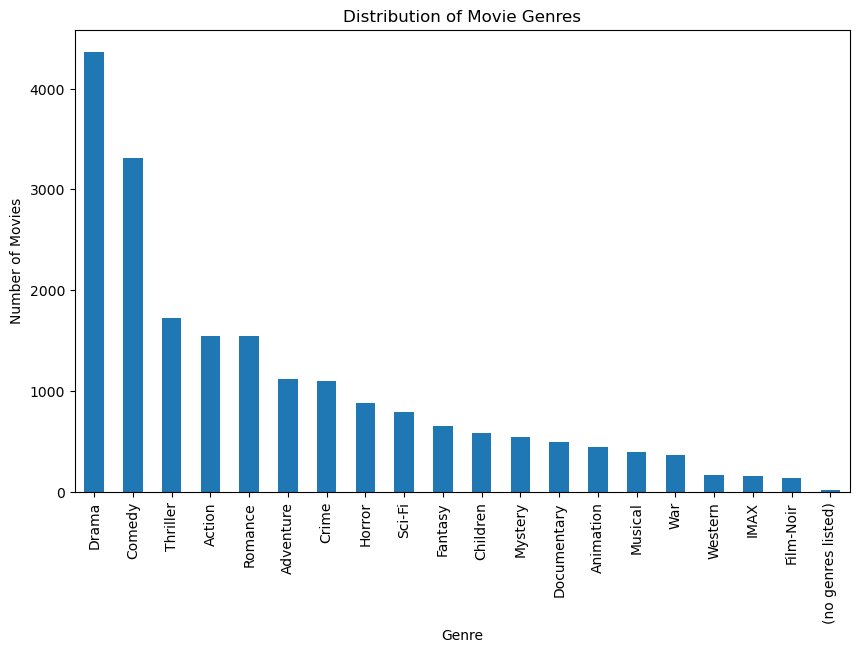

In [16]:
# Plot the distribution of movie genres
genre_counts = movies['genres'].str.split('|', expand=True).stack().value_counts()
genre_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

#Bar chart shows the distribution of movie genres.

# 2. Scattered Plot

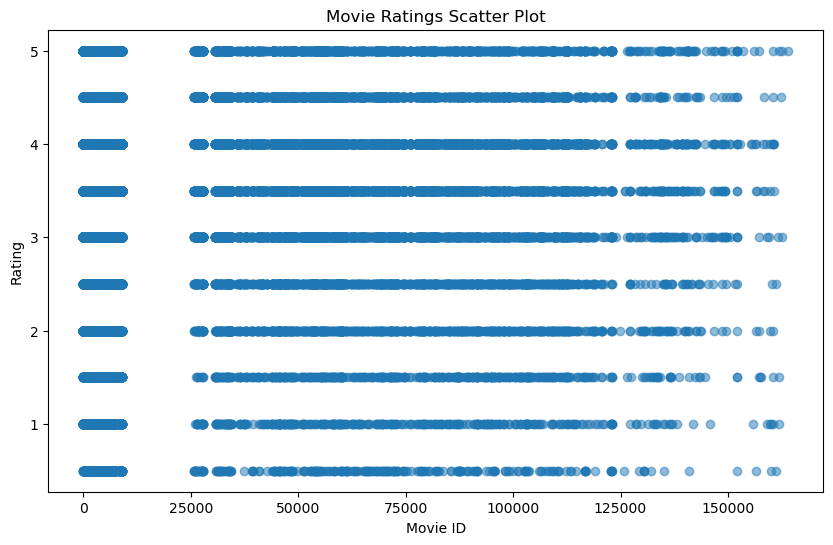

In [18]:
# Plot a scatter plot of ratings
plt.figure(figsize=(10, 6))
plt.scatter(ratings['movieId'], ratings['rating'], alpha=0.5)
plt.title('Movie Ratings Scatter Plot')
plt.xlabel('Movie ID')
plt.ylabel('Rating')
plt.show()

#Scatter plot visualizes the ratings of movies.

# 3. Pie Chart

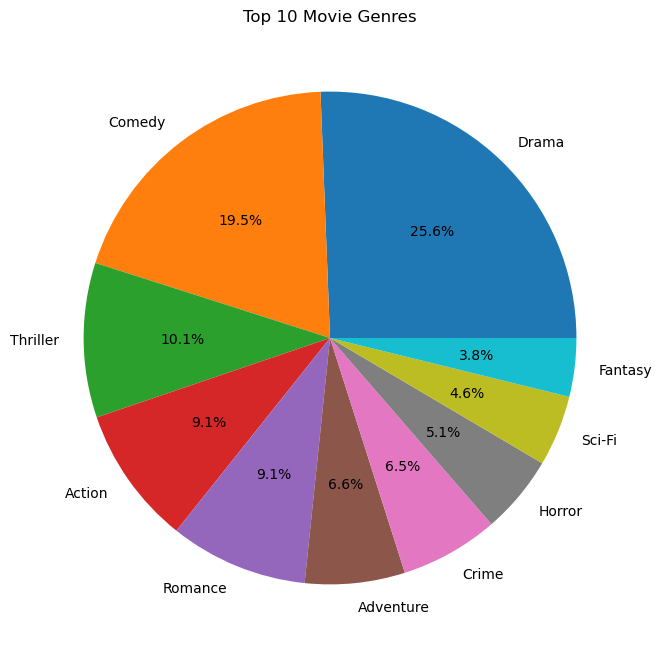

In [20]:
# Plot a pie chart of top genres
top_genres = genre_counts.head(10)
top_genres.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 10 Movie Genres')
plt.ylabel('')
plt.show()

#Pie chart displays the top 10 movie genres.


# Model Evaluation

In [22]:
# Evaluate the performance of the collaborative filtering model.

from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

# Create train-test split
train, test = train_test_split(ratings, test_size=0.2)

# Create pivot matrices for training and testing
user_movie_ratings_train = train.pivot(index='userId', columns='movieId', values='rating').fillna(0)
user_movie_ratings_test = test.pivot(index='userId', columns='movieId', values='rating').fillna(0)

def rmse(predictions, targets):
    return np.sqrt(mean_squared_error(predictions, targets))

# Make predictions
train_predictions = user_movie_ratings_train.mean(axis=0)
test_predictions = user_movie_ratings_test.mean(axis=0)

# Align predictions and targets
common_movies = train_predictions.index.intersection(test_predictions.index)
train_predictions = train_predictions[common_movies]
test_predictions = test_predictions[common_movies]

# Calculate RMSE
print('RMSE:', rmse(test_predictions, train_predictions))

#Split data into training and testing sets.
#Evaluate the collaborative filtering model using RMSE (Root Mean Squared Error).

RMSE: 0.1324367315207183


# Save and Load Models

In [24]:
# Save your models and load them for future use.

import joblib

# Save models
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(model, 'collaborative_model.pkl')

# Load models
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
model = joblib.load('collaborative_model.pkl')

#Save your TF-IDF vectorizer and collaborative filtering model using joblib.
#Load the models for future predictions.

In [25]:
'''
Summary
Step 1: Install libraries.
Step 2: Import libraries.
Step 3: Load and explore the dataset.
Step 4: Data preprocessing.
Step 5: Implement content-based filtering.
Step 6: Implement collaborative filtering.
Step 7: Combine methods to create a hybrid model.
Step 8: Visualize the data and recommendations.
Step 9: Evaluate the system.
Step 10: Save and load models.
'''

'\nSummary\nStep 1: Install libraries.\nStep 2: Import libraries.\nStep 3: Load and explore the dataset.\nStep 4: Data preprocessing.\nStep 5: Implement content-based filtering.\nStep 6: Implement collaborative filtering.\nStep 7: Combine methods to create a hybrid model.\nStep 8: Visualize the data and recommendations.\nStep 9: Evaluate the system.\nStep 10: Save and load models.\n'

In [26]:
--

SyntaxError: invalid syntax (3659366440.py, line 1)